In [27]:
__author__ = 'Security'
import numpy as np
from math import factorial
import scipy.stats as stats
%matplotlib inline
import matplotlib.pyplot as plt
from multiprocessing.dummy import Pool

In [46]:
N = 10000
sample = stats.expon.rvs(scale = theta, size=N)

slices = [sample[:n] for n in range(0, N)]

def getStatistics(k, n):
    sampleSlice = sample[:n] ** k
    return (factorial(k) / (sampleSlice.mean())) ** (1/float(k))


In [47]:
def getMean(k, theta):
    return np.min(np.array([abs(getStatistics(k, n) - theta) for n in range(1, N)]))


In [98]:
def configurePlot(theta, ymin, ymax):
    plt.figure(figsize=(15, 9))
    plt.title(r"$\theta= {0:}$".format(int(theta)))
    plt.ylabel(r"$|\hat{\theta} - \theta|$")
    plt.ylim(ymin, ymax)

def addPlot(k, theta):
    plt.plot(np.array([abs(getStatistics(k, n) - theta) for n in range(1, N)]), label='k = {:}'.format(int(k)))

def drawPlot(ks, theta, ymin = 0, ymax = theta):
    configurePlot(theta, ymin, ymax)
    for k in ks:
        addPlot(k, theta)
    plt.legend(loc='best')
    plt.show()

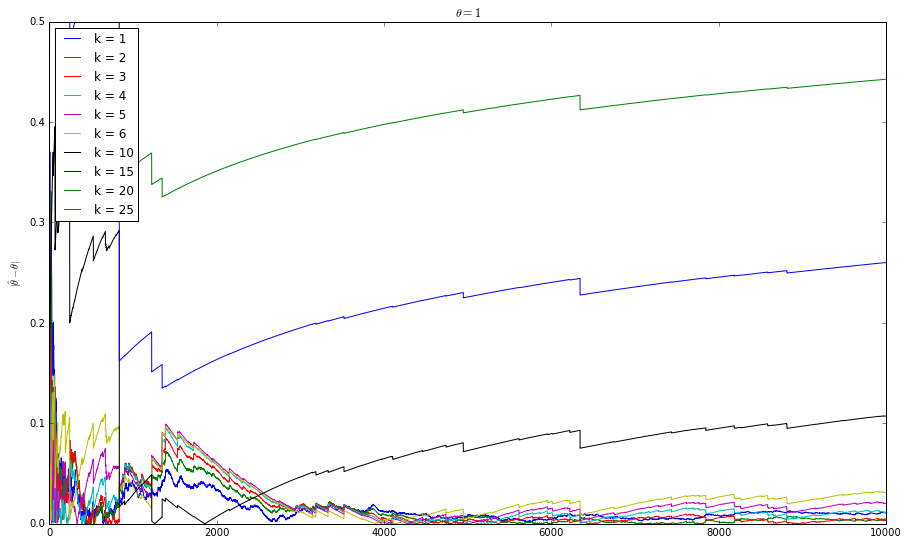

In [99]:
drawPlot([1, 2, 3, 4, 5, 6, 10, 15, 20, 25], 1, ymin=0)

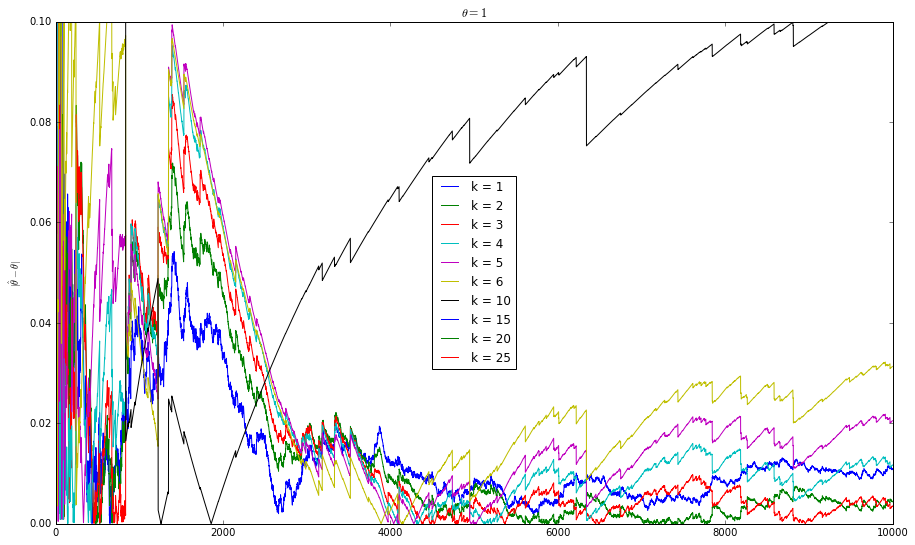

In [101]:
drawPlot([1, 2, 3, 4, 5, 6, 10, 15, 20, 25], 1, ymin=0, ymax=0.1)

In [105]:
def getBestK(theta):
    subres = [] #здесь будем хранить разницу значений в зависимости от k
    for _ in range(10):
        pool = Pool(4)
        results = pool.map(getMean, range(1, 12), theta)
        subres.append(np.argmin(results))
    return np.argmax(subres) + 1

Получим, наконец, оптимальное $k$

In [106]:
print(getBestK(1))

1


Отметим, что при значениях $\theta$ отличных от 1, получаются любопытные графики

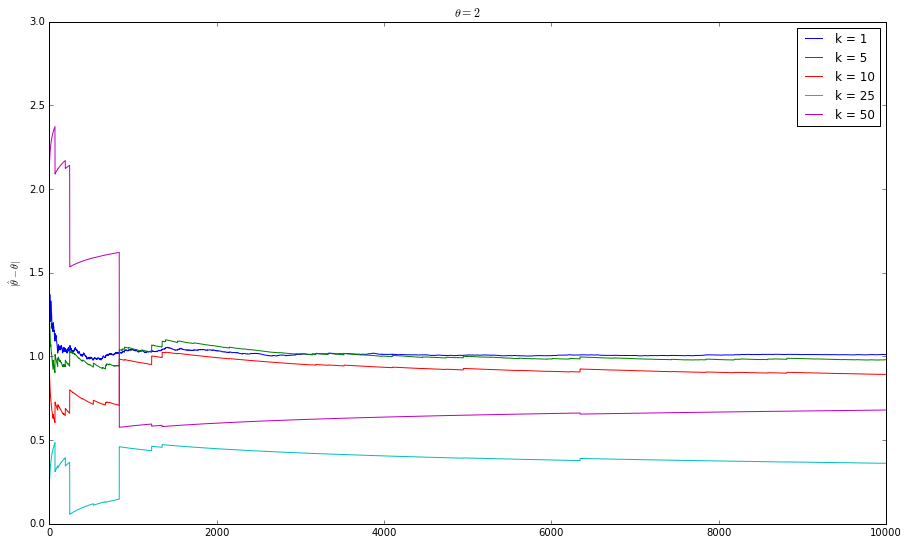

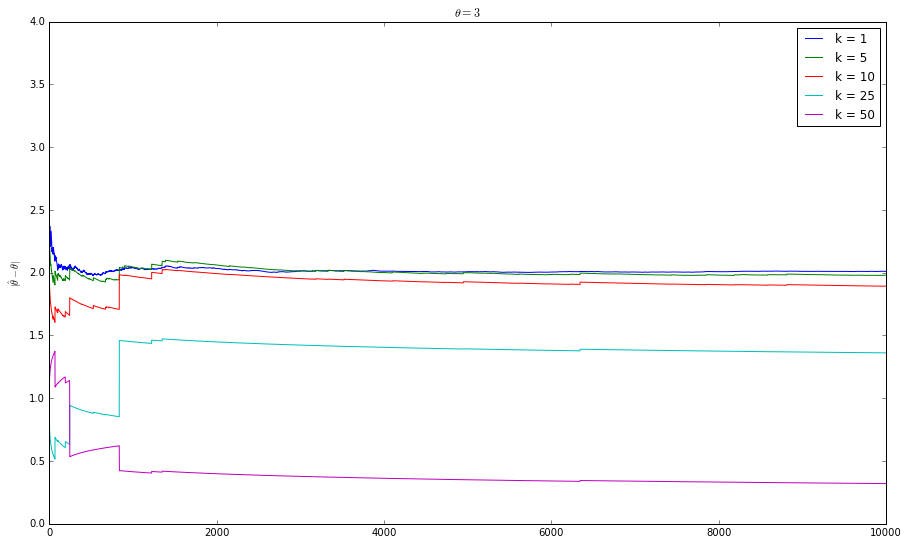

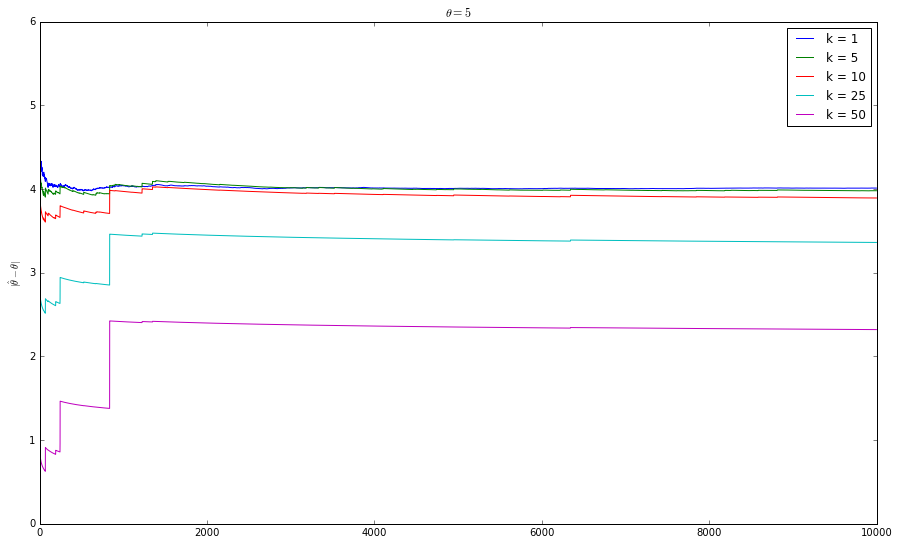

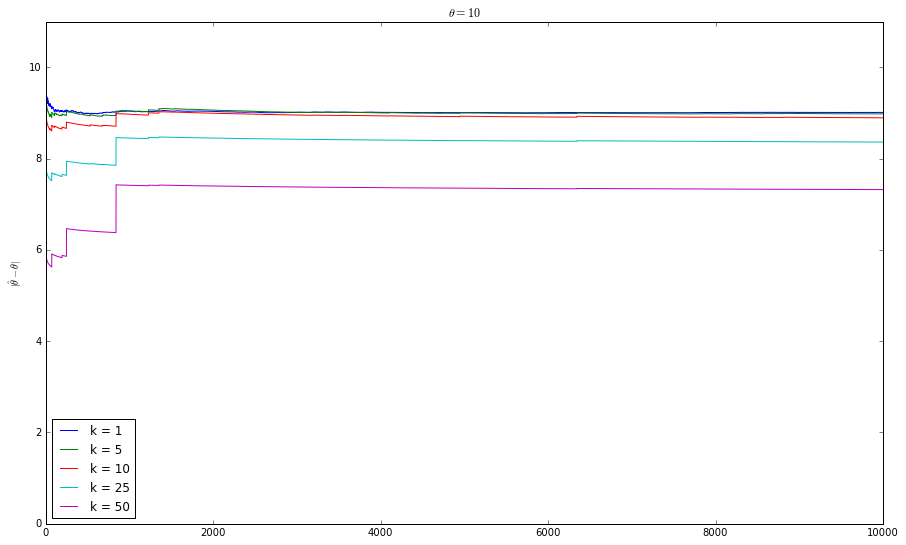

In [104]:
for th in [2, 3, 5, 10]:
    drawPlot([1, 5, 10, 25, 50], th, ymin = 0, ymax = th + 1)

По графикам видно, что выбор оптимального $k$ зависит от $\theta$